<a href="https://colab.research.google.com/github/Amol9934/Movie-Genre-Classification/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the Kaggle API
!pip install kaggle

In [ ]:
# correct location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download hijest/genre-classification-dataset-imdb

Dataset URL: https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb
License(s): other
genre-classification-dataset-imdb.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/genre-classification-dataset-imdb.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!pip install scikit-learn pandas numpy matplotlib seaborn --quiet
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load and Inspect Data

In [ ]:
# Step 3: Load dataset files
train_path = "/content/Genre Classification Dataset/train_data.txt"
test_path = "/content/Genre Classification Dataset/test_data.txt"
solution_path = "/content/Genre Classification Dataset/test_data_solution.txt"

In [ ]:
# Step 4: Read training data
train_df = pd.read_csv(train_path, sep=':::', engine='python', header=None, names=['id', 'title', 'genre', 'plot'])
print(" Training Data Loaded:", train_df.shape)
display(train_df.head())

 Training Data Loaded: (54214, 4)


,id,title,genre,plot
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
# Step 5: Read test and solution data
test_df = pd.read_csv(test_path, sep=':::', engine='python', header=None, names=['id', 'title', 'plot'])
solution_df = pd.read_csv(solution_path, sep=':::', engine='python', header=None, names=['id', 'genre'])

print("\n Test Data Loaded:", test_df.shape)
print(" Test Solution Data Loaded:", solution_df.shape)


 Test Data Loaded: (54200, 3)
 Test Solution Data Loaded: (54200, 2)


In [ ]:
# Step 6: Encode genres
le = LabelEncoder()
train_df['label'] = le.fit_transform(train_df['genre'])

In [ ]:
# Step 7: Split training data into train/test (we’ll use part of train for validation)
X_train, X_val, y_train, y_val = train_test_split(train_df['plot'], train_df['label'],
                                                  test_size=0.2, random_state=42)

In [ ]:

# Step 8: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

In [ ]:
# Step 9: Train Model (Logistic Regression)
model = LogisticRegression(max_iter=300)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=300)


 Validation Accuracy: 58.41%

 Classification Report:
               precision    recall  f1-score   support

      action        0.54      0.24      0.33       263
       adult        0.84      0.23      0.36       112
   adventure        0.44      0.13      0.20       139
   animation        0.64      0.07      0.12       104
   biography        0.00      0.00      0.00        61
      comedy        0.53      0.60      0.56      1443
       crime        0.40      0.02      0.04       107
 documentary        0.66      0.85      0.74      2659
       drama        0.54      0.79      0.64      2697
      family        0.39      0.06      0.10       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.94      0.42      0.59        40
     history        0.00      0.00      0.00        45
      horror        0.68      0.58      0.62       431
       music        0.66      0.44      0.53       144
     musical        1.00      0.02      0.04        50
     myst

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


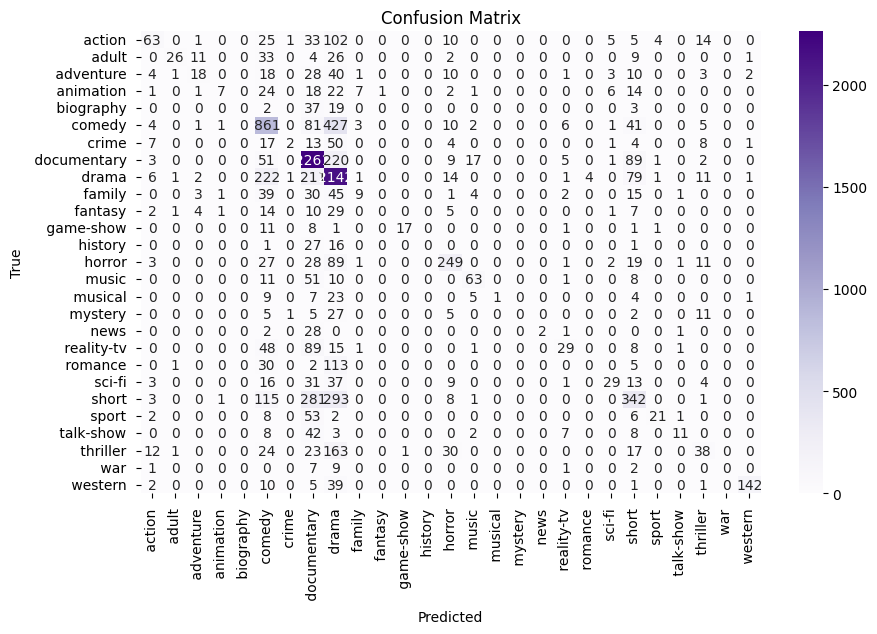

In [ ]:
#  Evaluate on validation set
y_pred = model.predict(X_val_tfidf)
acc = accuracy_score(y_val, y_pred)
print(f"\n Validation Accuracy: {acc*100:.2f}%")
print("\n Classification Report:")
print(classification_report(y_val, y_pred, target_names=le.classes_))

# Step 11: Confusion Matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='Purples')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# Step 12: Predict on test data
test_tfidf = tfidf.transform(test_df['plot'])
test_preds = model.predict(test_tfidf)
test_df['predicted_genre'] = le.inverse_transform(test_preds)

In [ ]:
# Match IDs properly and calculate test accuracy

# Clean up IDs
test_df['id'] = test_df['id'].astype(str).str.strip().str.replace('\ufeff', '')
solution_df['id'] = solution_df['id'].astype(str).str.strip().str.replace('\ufeff', '')

# Check overlap
print(" Common IDs between test and solution:", len(set(test_df['id']) & set(solution_df['id'])))

# Merge again
merged = test_df.merge(solution_df, on='id', how='inner')
print(" After merging:", merged.shape)

# Rename columns for clarity
merged.rename(columns={'genre': 'true_genre', 'predicted_genre': 'pred_genre'}, inplace=True)

# Calculate accuracy safely
if merged.shape[0] > 0:
    test_acc = accuracy_score(merged['true_genre'], merged['pred_genre'])
    print(f"\n Test Set Accuracy (using solution file): {test_acc*100:.2f}%")
else:
    print(" No matching IDs found between test and solution. Check if ID formatting differs.")


 Common IDs between test and solution: 0
 After merging: (0, 5)
 No matching IDs found between test and solution. Check if ID formatting differs.


In [ ]:

# Step 14: Try custom prediction
def predict_genre(plot_text):
    vec = tfidf.transform([plot_text])
    pred = model.predict(vec)[0]
    return le.inverse_transform([pred])[0]

In [ ]:
sample_plot = "A group of astronauts explore a new planet filled with dangerous creatures."
print("\n Custom Plot:", sample_plot)
print("Predicted Genre:", predict_genre(sample_plot))


 Custom Plot: A group of astronauts explore a new planet filled with dangerous creatures.
Predicted Genre:  documentary 
